In [1]:
from tensorflow import keras 
import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [6]:
model.compile(loss=keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD())

In [7]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 44us/sample - loss: 1.1734 - val_loss: 0.6142
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 1.0169 - val_loss: 0.4910
Epoch 3/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5000 - val_loss: 0.5532
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4741 - val_loss: 5.0205
Epoch 5/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.8088 - val_loss: 0.4188
Epoch 6/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4226 - val_loss: 0.5326
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4165 - val_loss: 0.3818
Epoch 8/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4006 - val_loss: 0.3683
Epoch 9/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3961 - val_l

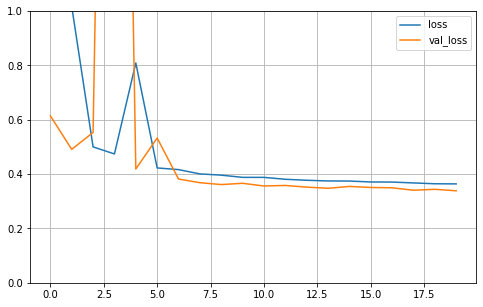

In [8]:
#Learning Curves

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [9]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.3704


Tensorboard for visualization

In [10]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")

In [ ]:
d